In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
import statsmodels.api as sm
pd.set_option('display.max_columns', 30)
# set_option displays the full dataset 

%matplotlib inline

In [2]:
hubub = pd.read_csv('data/hubNashville__311__Service_Requests.csv')

/opt/anaconda3/envs/env1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
hubub.head(30)

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,Preferred Language,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,238776,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,08/27/2019 10:54:14 PM,08/30/2019 09:16:18 AM,hubNashville Community,NaN,NaN,NaN,False,NaN,False,3944 Hydesdale Ln,NASHVILLE,1.0,37218,36.209180,-86.851510,"(36.20918, -86.85151)"
1,163209,In Progress,"Streets, Roads & Sidewalks",Guard Rails,Damaged Guard Rail,04/02/2019 05:27:16 PM,NaN,hubNashville Community,NaN,NaN,NaN,False,NaN,False,51 16th Ave,NASHVILLE,19.0,37203,36.148032,-86.792370,"(36.148032247977895, -86.792370374205)"
2,238499,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Trash,08/27/2019 05:49:16 PM,08/30/2019 08:16:17 PM,hubNashville Community,NaN,NaN,NaN,False,NaN,False,5056 Mountain Springs Rd,ANTIOCH,32.0,37013,36.043073,-86.614229,"(36.0430734, -86.61422879999998)"
3,163182,In Progress,"Streets, Roads & Sidewalks",Curbing and Berms,New Curb Request,04/02/2019 04:56:35 PM,NaN,Phone,NaN,NaN,NaN,False,NaN,False,4341 Golden Hill Dr,NASHVILLE,1.0,37218,36.219018,-86.857132,"(36.21901819999999, -86.85713190000001)"
4,117707,In Progress,Property Violations,Cars Parked on Lawn,NaN,11/19/2018 04:58:59 PM,NaN,hubNashville Community,NaN,NaN,NaN,False,105948.0,False,713 Yowell Ave,MADISON,9.0,37115,36.258171,-86.695753,"(36.2581712, -86.69575329999998)"
5,117842,In Progress,Property Violations,Dilapidated Structures,NaN,11/19/2018 11:04:13 PM,NaN,Mobile App,NaN,NaN,NaN,False,NaN,False,1526 Arthur Ave,NASHVILLE,19.0,37208,36.176445,-86.799289,"(36.1764452, -86.79928919999999)"
6,261290,Closed,"Trash, Recycling & Litter",Cart Service,Recycling - Request an Additional Cart,10/18/2019 04:09:09 PM,10/19/2019 09:05:48 AM,Phone,NaN,NaN,NaN,False,NaN,False,937 Allen Rd,NASHVILLE,15.0,37214,36.150180,-86.664752,"(36.15018000000001, -86.6647519)"
7,256146,Closed,"Streets, Roads & Sidewalks",Dead Animal Pickup,NaN,10/07/2019 05:05:23 PM,10/08/2019 04:15:20 PM,Phone,NaN,NaN,NaN,False,NaN,False,1766 Tyne Blvd,NASHVILLE,34.0,37215,36.072746,-86.825558,"(36.07274552960327, -86.82555796967468)"
8,238244,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Stolen Cart,08/27/2019 03:03:49 PM,09/09/2019 08:15:36 PM,Phone,NaN,NaN,NaN,False,NaN,False,1731 23rd Ave N,NASHVILLE,21.0,37208,36.179063,-86.814623,"(36.17906300000001, -86.81462299999998)"
9,256422,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,NaN,10/08/2019 01:00:48 PM,10/08/2019 01:00:48 PM,Phone,OE-00033211_10/7/2019 20:11,NaN,NaN,False,NaN,True,2801 CHARLOTTE AV,NASHVILLE,21.0,37209,36.153525,-86.818759,"(36.15352512, -86.81875927)"


In [4]:
hubub.tail()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,Preferred Language,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
250764,8832,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,08/16/2017 11:06:00 AM,08/18/2017 04:04:00 AM,Phone,NaN,NaN,NaN,False,NaN,True,205 29th ave N,NASHVILLE,21.0,37203,36.146150,-86.814680,"(36.14615, -86.81468)"
250765,5578,Closed,"Streets, Roads & Sidewalks",Contractor Complaint,NaN,08/09/2017 07:20:00 PM,08/11/2017 09:03:00 AM,Phone,NaN,NaN,NaN,False,NaN,False,5501 Hill Rd,BRENTWOOD,4.0,37027,36.046394,-86.753648,"(36.04639367, -86.75364774)"
250766,2171,Closed,"Trash, Recycling & Litter",Cart Service,Recycling - Request an Additional Cart,07/24/2017 03:05:00 PM,08/18/2017 04:01:00 AM,Phone,NaN,Resident,NaN,False,NaN,True,500 Dillard Ct,NASHVILLE,26.0,37220,36.058060,-86.760630,"(36.05806, -86.76063)"
250767,181244,Assigned,"Trash, Recycling & Litter",Litter,NaN,05/08/2019 04:57:26 PM,NaN,hubNashville Community,NaN,NaN,NaN,False,NaN,False,810 Jefferson St,NASHVILLE,19.0,37208,36.173333,-86.792352,"(36.1733327, -86.79235219999998)"
250768,188055,Closed,Property Violations,Tall Grass and Weeds,NaN,05/22/2019 04:13:22 PM,08/28/2019 07:03:05 AM,Phone,NaN,NaN,NaN,False,NaN,False,3813 Boatner Dr,NASHVILLE,2.0,37207,36.216115,-86.817725,"(36.2161151, -86.81772460000002)"


In [5]:
hubub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250769 entries, 0 to 250768
Data columns (total 21 columns):
Request #                     250769 non-null int64
Status                        250769 non-null object
Request Type                  250699 non-null object
Subrequest Type               216252 non-null object
Additional Subrequest Type    142162 non-null object
Date / Time Opened            250769 non-null object
Date / Time Closed            244166 non-null object
Request Origin                250769 non-null object
System of Origin ID           22655 non-null object
Contact Type                  25485 non-null object
Preferred Language            0 non-null float64
State Issue                   250769 non-null bool
Parent Request                2719 non-null float64
Closed When Created           250769 non-null bool
Address                       218660 non-null object
City                          217009 non-null object
Council District              216896 non-null float64

In [6]:
sub = hubub[hubub['Subrequest Type']=='Missed Pickup - Trash Cart Service']
sub['Address'].nunique()

13826

.

The above doesn't really work because it is double-counting an address if it is a separate entry

.

Let's remove the clutter of having extra columns 

In [7]:
hubub.columns

Index(['Request #', 'Status', 'Request Type', 'Subrequest Type',
       'Additional Subrequest Type', 'Date / Time Opened',
       'Date / Time Closed', 'Request Origin', 'System of Origin ID',
       'Contact Type', 'Preferred Language', 'State Issue', 'Parent Request',
       'Closed When Created', 'Address', 'City', 'Council District', 'ZIP',
       'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')

In [8]:
# What the heck is 'Parent Request'?

hubub = hubub.drop(columns={'Request Origin', 'System of Origin ID',
       'Contact Type', 'Preferred Language', 'State Issue', 'Parent Request'})

In [9]:
hubub.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,238776,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,08/27/2019 10:54:14 PM,08/30/2019 09:16:18 AM,False,3944 Hydesdale Ln,NASHVILLE,1.0,37218,36.209180,-86.851510,"(36.20918, -86.85151)"
1,163209,In Progress,"Streets, Roads & Sidewalks",Guard Rails,Damaged Guard Rail,04/02/2019 05:27:16 PM,NaN,False,51 16th Ave,NASHVILLE,19.0,37203,36.148032,-86.792370,"(36.148032247977895, -86.792370374205)"
2,238499,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Trash,08/27/2019 05:49:16 PM,08/30/2019 08:16:17 PM,False,5056 Mountain Springs Rd,ANTIOCH,32.0,37013,36.043073,-86.614229,"(36.0430734, -86.61422879999998)"
3,163182,In Progress,"Streets, Roads & Sidewalks",Curbing and Berms,New Curb Request,04/02/2019 04:56:35 PM,NaN,False,4341 Golden Hill Dr,NASHVILLE,1.0,37218,36.219018,-86.857132,"(36.21901819999999, -86.85713190000001)"
4,117707,In Progress,Property Violations,Cars Parked on Lawn,NaN,11/19/2018 04:58:59 PM,NaN,False,713 Yowell Ave,MADISON,9.0,37115,36.258171,-86.695753,"(36.2581712, -86.69575329999998)"


In [10]:
hubub.Status.value_counts()

Closed         244162
In Progress      4307
New              1674
Assigned          355
Transferred       241
On Hold            24
Denied              3
In Process          1
Completed           1
Escalated           1
Name: Status, dtype: int64

In [11]:

# What's the difference between closed and completed? 


In [12]:
hubub['Request Type'].value_counts()

Trash, Recycling & Litter              116606
Streets, Roads & Sidewalks              71046
Other                                   37146
Property Violations                     15468
Electric & Water General                 2907
Transit                                  2813
Public Safety                            2734
Permits                                  1029
Parks                                     709
Planning & Zoning                         199
Education & Libraries                      21
Public Records Request                     10
Workforce & Jobs                            8
Submit Budget Ideas to Mayor Briley         2
STMDRN                                      1
Name: Request Type, dtype: int64

Named columns the same as Suneethi's 

In [13]:
hubub = hubub.rename(columns={'Request #': 'Request_Id', 'Request Type':'Request_Type',
                               'Subrequest Type': 'Subrequest_Type',
                               'Additional Subrequest Type': 'Additional_Subrequest',
                              'Date / Time Opened' :'DT_Opened', 'Date / Time Closed':'DT_Closed',
                              'Council District': 'Council_Dist', 'ZIP':'Zip', 'Latitude':'Lat',
                              'Longitude':'Long', 'Mapped Location': 'Location'})

In [14]:
hubub.head()

,Request_Id,Status,Request_Type,Subrequest_Type,Additional_Subrequest,DT_Opened,DT_Closed,Closed When Created,Address,City,Council_Dist,Zip,Lat,Long,Location
0,238776,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,08/27/2019 10:54:14 PM,08/30/2019 09:16:18 AM,False,3944 Hydesdale Ln,NASHVILLE,1.0,37218,36.209180,-86.851510,"(36.20918, -86.85151)"
1,163209,In Progress,"Streets, Roads & Sidewalks",Guard Rails,Damaged Guard Rail,04/02/2019 05:27:16 PM,NaN,False,51 16th Ave,NASHVILLE,19.0,37203,36.148032,-86.792370,"(36.148032247977895, -86.792370374205)"
2,238499,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Trash,08/27/2019 05:49:16 PM,08/30/2019 08:16:17 PM,False,5056 Mountain Springs Rd,ANTIOCH,32.0,37013,36.043073,-86.614229,"(36.0430734, -86.61422879999998)"
3,163182,In Progress,"Streets, Roads & Sidewalks",Curbing and Berms,New Curb Request,04/02/2019 04:56:35 PM,NaN,False,4341 Golden Hill Dr,NASHVILLE,1.0,37218,36.219018,-86.857132,"(36.21901819999999, -86.85713190000001)"
4,117707,In Progress,Property Violations,Cars Parked on Lawn,NaN,11/19/2018 04:58:59 PM,NaN,False,713 Yowell Ave,MADISON,9.0,37115,36.258171,-86.695753,"(36.2581712, -86.69575329999998)"


We want to start parsing the dates and times so we can look at stuff by month

In [15]:
hubub['DT_Opened'].iloc[0]

'08/27/2019 10:54:14 PM'

In [16]:
hubub.drop(hubub[hubub['Request_Id']==0].index, inplace=True)

In [17]:
hubub[['Date_Only','Time_Only', 'AM_PM']]=hubub.DT_Opened.str.split(' ', expand=True)

In [18]:
hubub.head()

,Request_Id,Status,Request_Type,Subrequest_Type,Additional_Subrequest,DT_Opened,DT_Closed,Closed When Created,Address,City,Council_Dist,Zip,Lat,Long,Location,Date_Only,Time_Only,AM_PM
0,238776,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,08/27/2019 10:54:14 PM,08/30/2019 09:16:18 AM,False,3944 Hydesdale Ln,NASHVILLE,1.0,37218,36.209180,-86.851510,"(36.20918, -86.85151)",08/27/2019,10:54:14,PM
1,163209,In Progress,"Streets, Roads & Sidewalks",Guard Rails,Damaged Guard Rail,04/02/2019 05:27:16 PM,NaN,False,51 16th Ave,NASHVILLE,19.0,37203,36.148032,-86.792370,"(36.148032247977895, -86.792370374205)",04/02/2019,05:27:16,PM
2,238499,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Trash,08/27/2019 05:49:16 PM,08/30/2019 08:16:17 PM,False,5056 Mountain Springs Rd,ANTIOCH,32.0,37013,36.043073,-86.614229,"(36.0430734, -86.61422879999998)",08/27/2019,05:49:16,PM
3,163182,In Progress,"Streets, Roads & Sidewalks",Curbing and Berms,New Curb Request,04/02/2019 04:56:35 PM,NaN,False,4341 Golden Hill Dr,NASHVILLE,1.0,37218,36.219018,-86.857132,"(36.21901819999999, -86.85713190000001)",04/02/2019,04:56:35,PM
4,117707,In Progress,Property Violations,Cars Parked on Lawn,NaN,11/19/2018 04:58:59 PM,NaN,False,713 Yowell Ave,MADISON,9.0,37115,36.258171,-86.695753,"(36.2581712, -86.69575329999998)",11/19/2018,04:58:59,PM


In [19]:
hubub.sort_values(by = 'Date_Only', ascending=False)

,Request_Id,Status,Request_Type,Subrequest_Type,Additional_Subrequest,DT_Opened,DT_Closed,Closed When Created,Address,City,Council_Dist,Zip,Lat,Long,Location,Date_Only,Time_Only,AM_PM
130173,126691,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,12/31/2018 02:03:00 PM,01/02/2019 09:11:00 PM,False,1014 Fairwin Ave,NASHVILLE,5.0,37216,36.198414,-86.743504,"(36.1984137, -86.7435036)",12/31/2018,02:03:00,PM
127603,126884,Closed,"Streets, Roads & Sidewalks",Tree Maintenance on right of way,Tree fell in road or on sidewalk,12/31/2018 09:22:00 PM,01/03/2019 05:12:00 PM,False,700 Maplewood Ln,NASHVILLE,8.0,37216,36.227921,-86.737502,"(36.2279208, -86.7375022)",12/31/2018,09:22:00,PM
137432,126802,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Trash,12/31/2018 05:11:00 PM,01/23/2019 10:05:00 AM,False,6190 Del Sol Dr,WHITES CREEK,3.0,37189,36.237356,-86.815035,"(36.2373557, -86.8150353)",12/31/2018,05:11:00,PM
136220,126661,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,12/31/2018 01:13:00 AM,12/31/2018 08:18:00 PM,False,5617 Cloverland Park Dr,BRENTWOOD,4.0,37027,36.033560,-86.756870,"(36.03356, -86.75687)",12/31/2018,01:13:00,AM
131116,126833,Closed,"Trash, Recycling & Litter",Cart Service,Recycling - Report a Damaged Cart,12/31/2018 06:20:00 PM,01/02/2019 05:28:00 PM,False,4412 Elkins Ave,NASHVILLE,24.0,37209,36.150240,-86.840564,"(36.1502399, -86.8405638)",12/31/2018,06:20:00,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228395,35969,Closed,"Trash, Recycling & Litter",Cart Service,Recycling - Request an Additional Cart,01/01/2018 03:55:00 PM,01/10/2018 04:04:00 AM,True,2930 Lakeland Dr,NASHVILLE,14.0,37214,36.153670,-86.655230,"(36.15367, -86.65523)",01/01/2018,03:55:00,PM
242185,35962,Closed,Electric & Water General,Power Outage,NaN,01/01/2018 12:40:00 AM,01/03/2018 07:41:00 PM,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2018,12:40:00,AM
238028,35963,Closed,"Trash, Recycling & Litter",Trash in Recycling Cart,NaN,01/01/2018 11:21:00 AM,02/06/2018 11:02:00 AM,True,1840 JOY CIR,NASHVILLE,5.0,37207,36.202010,-86.759180,"(36.20201, -86.75918)",01/01/2018,11:21:00,AM
223605,35961,Closed,Electric & Water General,Power Outage,NaN,01/01/2018 12:40:00 AM,01/03/2018 07:40:00 PM,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2018,12:40:00,AM


In [20]:
hubub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250769 entries, 0 to 250768
Data columns (total 18 columns):
Request_Id               250769 non-null int64
Status                   250769 non-null object
Request_Type             250699 non-null object
Subrequest_Type          216252 non-null object
Additional_Subrequest    142162 non-null object
DT_Opened                250769 non-null object
DT_Closed                244166 non-null object
Closed When Created      250769 non-null bool
Address                  218660 non-null object
City                     217009 non-null object
Council_Dist             216896 non-null float64
Zip                      216889 non-null object
Lat                      217670 non-null float64
Long                     217670 non-null float64
Location                 217670 non-null object
Date_Only                250769 non-null object
Time_Only                250769 non-null object
AM_PM                    250769 non-null object
dtypes: bool(1), float64(

In [21]:
def extract_month(date_and_time):
    """
    This function takes as input a date and time, as formatted in the crashes 
    dataframe and returns the month, as an integer.
    
    example input: "12/31/2018 11:10:00 PM"
    example output: 12
    
    example input: "01/01/2018 12:00:00 AM"
    example output: 1
    """
    # Your code here
    new_value = date_and_time.split('/')
    return int(new_value[0])
# But you could run it without "int"

In [22]:
extract_month('12/31/2018 02:03:00 PM')

12

In [23]:
hubub['Month_Only']= hubub.DT_Opened.apply(extract_month)

In [24]:
hubub.head()

,Request_Id,Status,Request_Type,Subrequest_Type,Additional_Subrequest,DT_Opened,DT_Closed,Closed When Created,Address,City,Council_Dist,Zip,Lat,Long,Location,Date_Only,Time_Only,AM_PM,Month_Only
0,238776,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,08/27/2019 10:54:14 PM,08/30/2019 09:16:18 AM,False,3944 Hydesdale Ln,NASHVILLE,1.0,37218,36.209180,-86.851510,"(36.20918, -86.85151)",08/27/2019,10:54:14,PM,8
1,163209,In Progress,"Streets, Roads & Sidewalks",Guard Rails,Damaged Guard Rail,04/02/2019 05:27:16 PM,NaN,False,51 16th Ave,NASHVILLE,19.0,37203,36.148032,-86.792370,"(36.148032247977895, -86.792370374205)",04/02/2019,05:27:16,PM,4
2,238499,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Trash,08/27/2019 05:49:16 PM,08/30/2019 08:16:17 PM,False,5056 Mountain Springs Rd,ANTIOCH,32.0,37013,36.043073,-86.614229,"(36.0430734, -86.61422879999998)",08/27/2019,05:49:16,PM,8
3,163182,In Progress,"Streets, Roads & Sidewalks",Curbing and Berms,New Curb Request,04/02/2019 04:56:35 PM,NaN,False,4341 Golden Hill Dr,NASHVILLE,1.0,37218,36.219018,-86.857132,"(36.21901819999999, -86.85713190000001)",04/02/2019,04:56:35,PM,4
4,117707,In Progress,Property Violations,Cars Parked on Lawn,NaN,11/19/2018 04:58:59 PM,NaN,False,713 Yowell Ave,MADISON,9.0,37115,36.258171,-86.695753,"(36.2581712, -86.69575329999998)",11/19/2018,04:58:59,PM,11


The problem here is that (other than the fact that we still need to convert to datetime in order to get all the values in value_counts(),) we still need to differentiate between month/2018 and month/2019. So the current idea is to use a rolling window instead. 

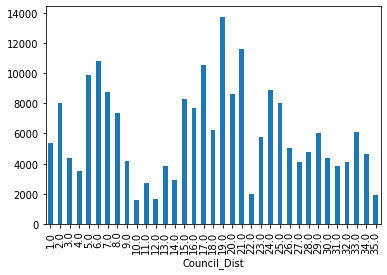

In [25]:
hubub.groupby('Council_Dist')['Subrequest_Type'].count().plot.bar();

In [26]:
%time 
hubub['DT_Opened'] = pd.to_datetime(hubub['DT_Opened'])

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


In [27]:
hubub.head()

,Request_Id,Status,Request_Type,Subrequest_Type,Additional_Subrequest,DT_Opened,DT_Closed,Closed When Created,Address,City,Council_Dist,Zip,Lat,Long,Location,Date_Only,Time_Only,AM_PM,Month_Only
0,238776,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2019-08-27 22:54:14,08/30/2019 09:16:18 AM,False,3944 Hydesdale Ln,NASHVILLE,1.0,37218,36.209180,-86.851510,"(36.20918, -86.85151)",08/27/2019,10:54:14,PM,8
1,163209,In Progress,"Streets, Roads & Sidewalks",Guard Rails,Damaged Guard Rail,2019-04-02 17:27:16,NaN,False,51 16th Ave,NASHVILLE,19.0,37203,36.148032,-86.792370,"(36.148032247977895, -86.792370374205)",04/02/2019,05:27:16,PM,4
2,238499,Closed,"Trash, Recycling & Litter",New Service/Activate Service,New Construction Residential Trash,2019-08-27 17:49:16,08/30/2019 08:16:17 PM,False,5056 Mountain Springs Rd,ANTIOCH,32.0,37013,36.043073,-86.614229,"(36.0430734, -86.61422879999998)",08/27/2019,05:49:16,PM,8
3,163182,In Progress,"Streets, Roads & Sidewalks",Curbing and Berms,New Curb Request,2019-04-02 16:56:35,NaN,False,4341 Golden Hill Dr,NASHVILLE,1.0,37218,36.219018,-86.857132,"(36.21901819999999, -86.85713190000001)",04/02/2019,04:56:35,PM,4
4,117707,In Progress,Property Violations,Cars Parked on Lawn,NaN,2018-11-19 16:58:59,NaN,False,713 Yowell Ave,MADISON,9.0,37115,36.258171,-86.695753,"(36.2581712, -86.69575329999998)",11/19/2018,04:58:59,PM,11


In [28]:
def extract_month_again(date_and_time):
 
    # Your code here
    new_value = date_and_time.split('-')
    return int(new_value[1])
# But you could run it without "int"

In [29]:
extract_month_again('2019-08-27 22:54:14')

8

In [45]:
hubub['DT_Opened'].iloc[0]

Timestamp('2019-08-27 22:54:14')

In [41]:
hubub[['Date_Only','Time_Only']]=hubub.DT_Opened.str.split(' ', expand=True)

AttributeError: Can only use .str accessor with string values!

In [30]:
hubub['Month_Only']= hubub.DT_Opened.apply(extract_month_again)

AttributeError: 'Timestamp' object has no attribute 'split'

In [ ]:
hubub.info()

In [40]:
hubub['DT_Opened'].astype('int64')

0         1566946454000000000
1         1554226036000000000
2         1566928156000000000
3         1554224195000000000
4         1542646739000000000
                 ...         
250764    1502881560000000000
250765    1502306400000000000
250766    1500908700000000000
250767    1557334646000000000
250768    1558541602000000000
Name: DT_Opened, Length: 250769, dtype: int64

In [47]:
# After we get date we want a rolling window '6M'
# We also need a 1w window to see what is duplicated 